# 1. Create a image



(-0.5, 7.5, 7.5, -0.5)

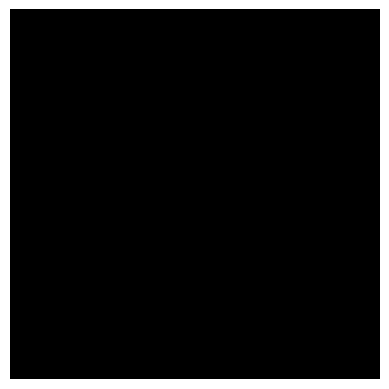

In [20]:
import numpy as np

image = np.zeros((8, 8), dtype=np.uint8)

plt.imshow(image,cmap="gray")
plt.axis("off")

# 2. Create a kernel

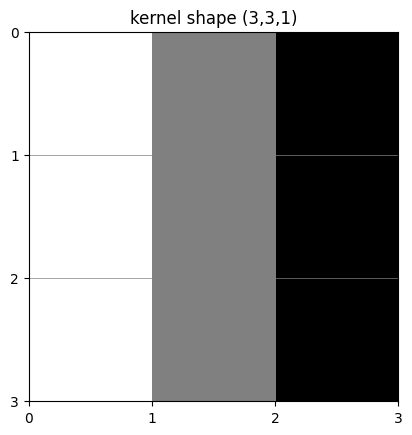

In [37]:
# Define a simple kernel (3x3)
kernel = np.array([[1, 0, -1], 
                   [1, 0, -1], 
                   [1, 0, -1]], dtype=np.float32)


k = kernel.shape[0]

plt.imshow(kernel,cmap='gray',extent=[0,kernel.shape[1],kernel.shape[0],0])
plt.title("kernel shape (3,3,1)")
plt.xticks(np.arange(0, kernel.shape[1] + 1, 1))
plt.yticks(np.arange(0,kernel.shape[1]+1,1))
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)
plt.show()


In [38]:
# fig, ax = plt.subplots(figsize=(5, 5))

# # Kernel Image
# ax.imshow(kernel, cmap='gray', extent=[0, kernel.shape[1], kernel.shape[0], 0])
# ax.set_title("Kernel Shape (3, 3)")
# ax.set_xticks(np.arange(0, kernel.shape[1] + 1, 1))
# ax.set_yticks(np.arange(0, kernel.shape[0] + 1, 1))
# ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# plt.show()

# 3. Create output image and apply filter

In [ ]:

rows,cols = image.shape
output_matrix = np.zeros((rows-k+1,cols-k+1))
output_matrix

## we have to chose the 3,3 box from the image
for i in range(0,rows-2):
  for j in range(0,cols-2):
    region = image[i:i+3,j:j+3]
    output_matrix[i,j] = np.sum(region*kernel)

# # no_p = cv2.filter2D(image,-1,kernel)
# plt.imshow(output_matrix,cmap="gray")
# plt.axis("off")

<Figure size 1000x500 with 0 Axes>

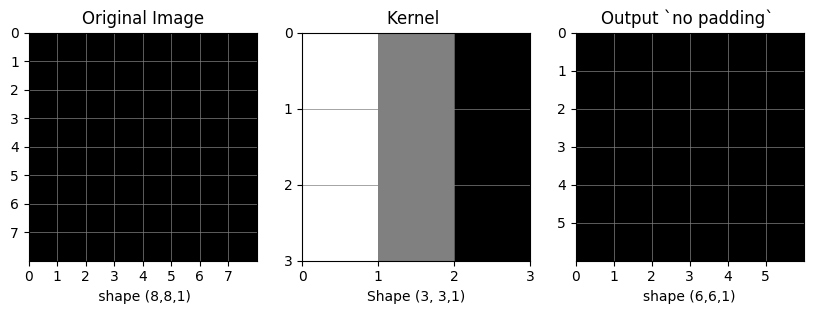

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Original Image
axs[0].imshow(image, cmap='gray', extent=[0, image.shape[1], image.shape[0], 0])
axs[0].set_title("Original Image")
axs[0].set_xlabel(" shape (8,8,1)")
axs[0].set_xticks(np.arange(0, image.shape[1], 1))
axs[0].set_yticks(np.arange(0, image.shape[0], 1))
axs[0].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

axs[1].imshow(kernel, cmap='gray', extent=[0, kernel.shape[1], kernel.shape[0], 0])
axs[1].set_title("Kernel ")
axs[1].set_xlabel("Shape (3, 3,1)")
axs[1].set_xticks(np.arange(0, kernel.shape[1] + 1, 1))
axs[1].set_yticks(np.arange(0, kernel.shape[0] + 1, 1))
axs[1].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Convolution Output
axs[2].imshow(output_matrix, cmap='gray', extent=[0, output_matrix.shape[1], output_matrix.shape[0], 0])
axs[2].set_title("Output `no padding` ")
axs[2].set_xlabel("shape (6,6,1)")
axs[2].set_xticks(np.arange(0, output_matrix.shape[1], 1))
axs[2].set_yticks(np.arange(0, output_matrix.shape[0], 1))
axs[2].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.show()

# 4. Create a padded image

In [61]:


# Apply kernel with padding using cv2.copyMakeBorder to add zero padding before applying the filter
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# padding_result = cv2.filter2D(padded_image, -1, kernel)

padded_image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
padding_result = cv2.filter2D(src=image,ddepth=-1,kernel=kernel)

# plt.imshow(padded_image,cmap='gray',extent=[0,padded_image.shape[1],padded_image.shape[0],0])
# plt.title("padded image shape (10,10,1)")
# plt.xticks(np.arange(0, padded_image.shape[1] + 1, 1))
# plt.yticks(np.arange(0,padded_image.shape[1]+1,1))
# plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)
# plt.show()


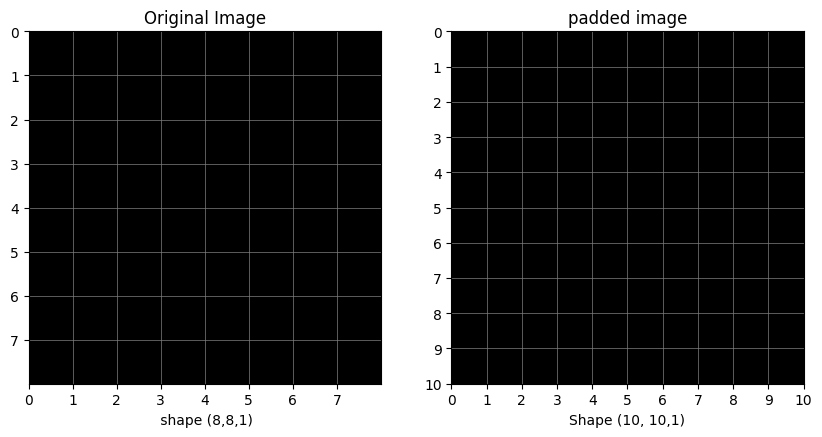

In [63]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axs[0].imshow(image, cmap='gray', extent=[0, image.shape[1], image.shape[0], 0])
axs[0].set_title("Original Image")
axs[0].set_xlabel(" shape (8,8,1)")
axs[0].set_xticks(np.arange(0, image.shape[1], 1))
axs[0].set_yticks(np.arange(0, image.shape[0], 1))
axs[0].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

axs[1].imshow(padded_image, cmap='gray', extent=[0, padded_image.shape[1], padded_image.shape[0], 0])
axs[1].set_title("padded image")
axs[1].set_xlabel("Shape (10, 10,1)")
axs[1].set_xticks(np.arange(0, padded_image.shape[1] + 1, 1))
axs[1].set_yticks(np.arange(0, padded_image.shape[0] + 1, 1))
axs[1].grid(which='both', color='gray', linestyle='-', linewidth=0.5)



# 5. Apply kernel on padded image

<Figure size 1000x500 with 0 Axes>

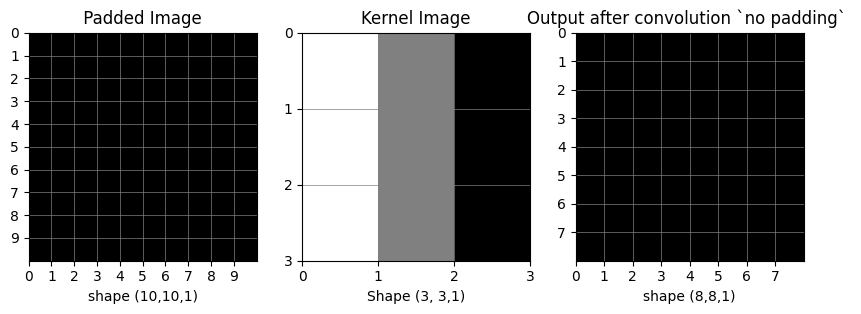

In [57]:
fig = plt.figure(figsize=(10,5))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Original Image
axs[0].imshow(padded_image, cmap='gray', extent=[0, padded_image.shape[1], padded_image.shape[0], 0])
axs[0].set_title(" Padded Image ")
axs[0].set_xlabel("shape (10,10,1)")
axs[0].set_xticks(np.arange(0, padded_image.shape[1], 1))
axs[0].set_yticks(np.arange(0, padded_image.shape[0], 1))
axs[0].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

axs[1].imshow(kernel, cmap='gray', extent=[0, kernel.shape[1], kernel.shape[0], 0])
axs[1].set_title("Kernel Image")
axs[1].set_xlabel("Shape (3, 3,1)")
axs[1].set_xticks(np.arange(0, kernel.shape[1] + 1, 1))
axs[1].set_yticks(np.arange(0, kernel.shape[0] + 1, 1))
axs[1].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Convolution Output
axs[2].imshow(padding_result, cmap='gray', extent=[0, padding_result.shape[1], padding_result.shape[0], 0])
axs[2].set_title("Output after convolution `no padding` ")
axs[2].set_xlabel("shape (8,8,1)")
axs[2].set_xticks(np.arange(0, padding_result.shape[1], 1))
axs[2].set_yticks(np.arange(0, padding_result.shape[0], 1))
axs[2].grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.show()